# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 1 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and first Inspection

1. __Import__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
movie_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 1/movies_complete.csv')

Mounted at /content/drive


In [ ]:
movie_df.head(3)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch


__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [ ]:
# movie_df['genres'] = movie_df['genres'].str.split('|')
# movie_df['cast'] = movie_df['cast'].str.split('|')
# movie_df['production_companies'] = movie_df['production_companies'].str.split('|')
# movie_df['spoken_languages'] = movie_df['spoken_languages'].str.split('|')
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

In [ ]:
df_best = movie_df[["title", "poster_path", "budget_musd", "revenue_musd",
              "vote_count", "vote_average", "popularity"]].copy()

df_best["profit"] = df_best['revenue_musd']-df_best['budget_musd']
df_best["roi"] = df_best['revenue_musd']/df_best['budget_musd']
df_best.columns = ["Title", "Poster", "Budget", "Revenue", "Votes", "Average Rating", "Popularity", "Profit", "ROI"]
df_best.set_index("Title", inplace=True)

In [ ]:
df_best

,Poster,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.0,4.0,0.072051,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.0,9.0,0.178241,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.0,3.8,0.903007,NaN,NaN


## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

__Define__ an appropriate __user-defined function__ to reuse code.

In [ ]:
def sortndisplay(by, n, ascending=False, min_budget=0, min_votes=0):
  movie_df2 = df_best.loc[(df_best.Budget >= min_budget) & (df_best.Votes >= min_votes), ["Poster", by]].sort_values([by], ascending = ascending).head(n).copy()
  return HTML(movie_df2.to_html(escape=False))

__Movies Top 5 - Highest Revenue__

In [ ]:
sortndisplay("Revenue", 5, ascending=False)

,Poster,Revenue
Title,,
Avatar,,2787.965087
Star Wars: The Force Awakens,,2068.223624
Titanic,,1845.034188
The Avengers,,1519.557910
Jurassic World,,1513.528810


__Movies Top 5 - Highest Budget__

In [ ]:
sortndisplay("Budget", 5, ascending=False)

,Poster,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.0
Pirates of the Caribbean: At World's End,,300.0
Avengers: Age of Ultron,,280.0
Superman Returns,,270.0
John Carter,,260.0


__Movies Top 5 - Highest Profit__

In [ ]:
sortndisplay("Profit", 5, ascending=False)

,Poster,Profit
Title,,
Avatar,,2550.965087
Star Wars: The Force Awakens,,1823.223624
Titanic,,1645.034188
Jurassic World,,1363.528810
Furious 7,,1316.249360


__Movies Top 5 - Lowest Profit__

In [ ]:
sortndisplay("Profit", 5, ascending=True)

,Poster,Profit
Title,,
The Lone Ranger,,-165.710090
The Alamo,,-119.180039
Mars Needs Moms,,-111.007242
Valerian and the City of a Thousand Planets,,-107.447384
The 13th Warrior,,-98.301101


__Movies Top 5 - Highest ROI__

In [ ]:
sortndisplay("ROI", 5, min_budget=10, ascending=False)

,Poster,ROI
Title,,
E.T. the Extra-Terrestrial,,75.520507
Star Wars,,70.490728
Pretty Woman,,33.071429
The Intouchables,,32.806221
The Empire Strikes Back,,29.911111


__Movies Top 5 - Lowest ROI__

In [ ]:
sortndisplay("ROI", 5, min_budget=10, ascending=True)

,Poster,ROI
Title,,
Chasing Liberty,,5.217391e-07
The Cookout,,7.500000e-07
Deadfall,,1.800000e-06
In the Cut,,1.916667e-06
The Samaritan,,2.100833e-04


__Movies Top 5 - Most Votes__

In [ ]:
sortndisplay("Votes", 5, ascending=False)

,Poster,Votes
Title,,
Inception,,14075.0
The Dark Knight,,12269.0
Avatar,,12114.0
The Avengers,,12000.0
Deadpool,,11444.0


__Movies Top 5 - Highest Rating__

In [ ]:
sortndisplay("Average Rating", 5, ascending=False, min_votes=10)

,Poster,Average Rating
Title,,
Dilwale Dulhania Le Jayenge,,9.1
Stop Making Sense,,8.7
Human,,8.6
Tosun Pasha,,8.6
The Shawshank Redemption,,8.5


__Movies Top 5 - Lowest Rating__

In [ ]:
sortndisplay("Average Rating", 5, min_votes=10, ascending=True)

,Poster,Average Rating
Title,,
Call Me by Your Name,,0.0
Extinction: Nature Has Evolved,,0.0
The Cloth,,1.9
Manos: The Hands of Fate,,2.0
Killjoy,,2.2


__Movies Top 5 - Most Popular__

In [ ]:
sortndisplay("Popularity", 5, ascending=False)

,Poster,Popularity
Title,,
Minions,,547.488298
Wonder Woman,,294.337037
Beauty and the Beast,,287.253654
Baby Driver,,228.032744
Big Hero 6,,213.849907


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

In [ ]:
mask_genres = movie_df["genres"].str.contains('Science Fiction') & movie_df["genres"].str.contains('Action')
mask_actor = movie_df["cast"].str.contains("Bruce Willis")
bruce_df = movie_df.loc[mask_actor & mask_genres, ['title', 'poster_path' ,'vote_average']].sort_values('vote_average', ascending=False)
bruce_df.set_index('title', inplace=True)
HTML(bruce_df.to_html(escape=False))

,poster_path,vote_average
title,,
The Fifth Element,,7.3
Looper,,6.6
Armageddon,,6.5
Surrogates,,5.9
G.I. Joe: Retaliation,,5.4
Vice,,4.1


__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

In [ ]:
mask_director = movie_df["director"].str.contains('Quentin Tarantino')
mask_actor = movie_df["cast"].str.contains("Uma Thurman")
uma_tarantino = movie_df.loc[mask_actor & mask_director, ['title', 'poster_path', 'runtime']].sort_values('runtime', ascending=True)
uma_tarantino.set_index('title', inplace=True)
HTML(uma_tarantino.to_html(escape=False))

,poster_path,runtime
title,,
Kill Bill: Vol. 1,,111.0
Kill Bill: Vol. 2,,136.0
Pulp Fiction,,154.0


__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

In [ ]:
studio_mask = (movie_df.production_companies.str.contains("Pixar")).fillna(False)
year_mask = ((movie_df.release_date >= '2010-01-01') & (movie_df.release_date < '2016-01-01'))
pixar_10_15 = movie_df.loc[studio_mask & year_mask, ['title', 'poster_path', 'revenue_musd', 'release_date']].sort_values('revenue_musd', ascending=False)
pixar_10_15.set_index('title', inplace=True)
HTML(pixar_10_15.to_html(escape=False))

,poster_path,revenue_musd,release_date
title,,,
Toy Story 3,,1066.969703,2010-06-16
Inside Out,,857.611174,2015-06-09
Monsters University,,743.559607,2013-06-20
Cars 2,,559.852396,2011-06-11
Brave,,538.983207,2012-06-21
The Good Dinosaur,,331.926147,2015-11-14
Day & Night,,NaN,2010-06-17
The Blue Umbrella,,NaN,2013-02-12
Toy Story of Terror!,,NaN,2013-10-15


__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [ ]:
lang_mask = movie_df.original_language == 'en'
genres_mask = movie_df.genres.str.contains('Action') | movie_df.genres.str.contains('Thriller')
rating_mask = movie_df.vote_average >= 7.5
count_mask = movie_df.vote_count >= 10
action_thrill = movie_df.loc[lang_mask & genres_mask & rating_mask & count_mask, ['title', 'poster_path', 'genres','vote_average', 'vote_count', 'release_date']].sort_values('release_date', ascending=False).head(20)
action_thrill.set_index('title', inplace=True)
HTML(action_thrill.to_html(escape=False))

,poster_path,genres,vote_average,vote_count,release_date
title,,,,,
Descendants 2,,TV Movie|Family|Action|Comedy|Music|Adventure,7.5,171.0,2017-07-21
Dunkirk,,Action|Drama|History|Thriller|War,7.5,2712.0,2017-07-19
The Book of Henry,,Thriller|Drama|Crime,7.6,84.0,2017-06-16
Guardians of the Galaxy Vol. 2,,Action|Adventure|Comedy|Science Fiction,7.6,4858.0,2017-04-19
Logan,,Action|Drama|Science Fiction,7.6,6310.0,2017-02-28
The Thinning,,Thriller,7.6,92.0,2016-10-12
11.22.63,,Drama|History|Thriller,8.0,213.0,2016-02-15
Star Wars: The Force Awakens,,Action|Adventure|Science Fiction|Fantasy,7.5,7993.0,2015-12-15
London Spy,,Romance|Crime|Drama|Mystery|Thriller,8.8,12.0,2015-11-09


## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

__Franchise vs. Stand-alone: Average Revenue__

In [ ]:
movie_df["franchise"] = movie_df.belongs_to_collection.notna()

In [ ]:
movie_df.groupby("franchise").revenue_musd.mean()

franchise
False     44.742814
True     165.708193
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [ ]:
movie_df["roi"] = movie_df['revenue_musd']/movie_df['budget_musd']
movie_df.groupby("franchise").roi.median()

franchise
False    1.619699
True     3.709195
Name: roi, dtype: float64

__Franchise vs. Stand-alone: Average Budget__

In [ ]:
movie_df.groupby("franchise").budget_musd.mean()

franchise
False    18.047741
True     38.319847
Name: budget_musd, dtype: float64

__Franchise vs. Stand-alone: Average Popularity__

In [ ]:
movie_df.groupby("franchise").popularity.mean()

franchise
False    2.592726
True     6.245051
Name: popularity, dtype: float64

__Franchise vs. Stand-alone: Average Rating__

In [ ]:
movie_df.groupby("franchise").vote_average.mean()

franchise
False    6.008787
True     5.956806
Name: vote_average, dtype: float64

In [ ]:
movie_df.groupby("franchise").agg({"budget_musd": "mean", "revenue_musd": "mean", "vote_average": "mean",
                            "popularity": "mean", "roi":"median", "vote_count":"mean"})

,budget_musd,revenue_musd,vote_average,popularity,roi,vote_count
franchise,,,,,,
False,18.047741,44.742814,6.008787,2.592726,1.619699,78.289550
True,38.319847,165.708193,5.956806,6.245051,3.709195,412.387856


## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [ ]:
movie_df.belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
44686                               NaN
44687                               NaN
44688                               NaN
44689                               NaN
44690                               NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [ ]:
franchise_df = movie_df.groupby('belongs_to_collection').agg({"title": "count", "budget_musd": ["sum", "mean"], 
                                                      "revenue_musd": ["sum", "mean"],
                                                      "vote_average": "mean", "popularity": "mean",
                                                      "roi":"median", 
                                                      "vote_count":"mean"})

In [ ]:
franchise_df.nlargest(20, ("title", "count"))

title  ...   vote_count
                                       count  ...         mean
belongs_to_collection                         ...             
The Bowery Boys                           29  ...     0.724138
Totò Collection                           27  ...    18.037037
James Bond Collection                     26  ...  1284.307692
Zatôichi: The Blind Swordsman             26  ...    11.192308
The Carry On Collection                   25  ...    21.040000
Charlie Chan (Sidney Toler) Collection    21  ...     5.809524
Pokémon Collection                        20  ...    71.100000
Godzilla (Showa) Collection               16  ...    39.750000
Charlie Chan (Warner Oland) Collection    15  ...     6.866667
Dragon Ball Z (Movie) Collection          15  ...   133.333333
Uuno Turhapuro                            15  ...     3.866667
Monster High Collection                   14  ...    12.571429
The Land Before Time Collection           14  ...    96.071429
George Carlin Comedy Collection           13  ...    12.538462
Sharpe Collection                         13  ...    13.230769
Friday the 13th Collection                12  ...   326.583333
Johan Falk GSI Collection                 12  ...     9.250000
Sherlock Holmes (1939 series)             12  ...    21.583333
The Amityville Horror Collection          12  ...    91.916667
An American Girl Collection               10  ...     8.700000

[20 rows x 9 columns]

In [ ]:
franchise_df.nlargest(20, ("revenue_musd", "mean"))

title budget_musd  ...        roi    vote_count
                                    count         sum  ...     median          mean
belongs_to_collection                                  ...                         
Avatar Collection                       1      237.00  ...  11.763566  12114.000000
The Avengers Collection                 2      500.00  ...   5.963190   9454.000000
Frozen Collection                       2      150.00  ...   8.494793   3035.000000
Finding Nemo Collection                 2      294.00  ...   7.573212   5312.500000
The Hobbit Collection                   3      750.00  ...   3.833600   5981.333333
The Lord of the Rings Collection        3      266.00  ...  11.725157   8253.000000
Harry Potter Collection                 8     1280.00  ...   6.165086   5983.250000
Star Wars Collection                    8      854.35  ...   8.239637   5430.375000
Despicable Me Collection                6      299.00  ...  12.761987   3041.333333
Pirates of the Caribbean Collection     5     1250.00  ...   3.453009   5016.000000
The Secret Life of Pets Collection      1       75.00  ...  11.672772   3536.000000
Transformers Collection                 5      965.00  ...   5.197167   3046.400000
Spider-Man Collection                   3      597.00  ...   3.918832   4505.666667
The Dark Knight Collection              3      585.00  ...   4.339756   9681.000000
Wonder Woman Collection                 1      149.00  ...   5.507251   5025.000000
Guardians of the Galaxy Collection      2      370.00  ...   4.433036   7436.000000
Fantastic Beasts Collection             1      180.00  ...   4.496346   5612.000000
Iron Man Collection                     3      540.00  ...   4.179816   8290.333333
The Lion King Collection                4       45.00  ...  17.516484   1827.500000
Deadpool Collection                     1       58.00  ...  13.501948  11444.000000

[20 rows x 9 columns]

In [ ]:
franchise_df.nlargest(20, ("vote_average", "mean"))

title budget_musd  ...        roi   vote_count
                                    count         sum  ...     median         mean
belongs_to_collection                                  ...                        
Argo Collection                         1         0.0  ...        NaN     2.000000
Bloodfight                              1         0.0  ...        NaN     1.000000
Dreileben                               1         0.0  ...        NaN     2.000000
Kenji Misumi's Trilogy of the Sword     1         0.0  ...        NaN     2.000000
Алиса в стране чудес (Коллекция)        1         0.0  ...        NaN     6.000000
We Were Here                            2         0.0  ...        NaN     4.000000
Kizumonogatari                          3         0.0  ...        NaN    10.666667
Glass Tiger collection                  1         0.0  ...        NaN    12.000000
OSS 117 The Original Saga               1         0.0  ...        NaN     2.000000
Spirits' Homecoming Collection          1         0.0  ...        NaN     5.000000
The Nigger Charley Collection           1         0.0  ...        NaN     2.000000
The Human Condition                     3         0.0  ...        NaN    33.666667
Little Forest Collection                2         0.0  ...        NaN    15.500000
Psy Collection                          2         0.0  ...        NaN     7.500000
Kiler Collection                        2         0.0  ...        NaN    14.000000
The Lord of the Rings Collection        3       266.0  ...  11.725157  8253.000000
In the Vineyard Collection              1         0.0  ...        NaN     4.000000
Macskafogó gyűjtemény                   1         0.0  ...        NaN    20.000000
The Apu Collection                      3         0.0  ...        NaN    49.000000
The South Shaolin Master Collection     1         0.0  ...        NaN     1.000000

[20 rows x 9 columns]

## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

In [ ]:
movie_df.director.value_counts()

John Ford             66
Michael Curtiz        65
Werner Herzog         54
Alfred Hitchcock      53
Georges Méliès        49
                      ..
Tim Usborne            1
Çağatay Tosun          1
Brandon Cronenberg     1
Neema Barnette         1
Michael Kloft          1
Name: director, Length: 17349, dtype: int64

In [ ]:
director_df = movie_df.groupby('director').agg({"title": "count", "revenue_musd": ["sum", "mean"],
                                                      "vote_average": "mean", "vote_count": ["sum", "mean"]})
director_df.nlargest(20, ("title", "count"))

title revenue_musd  ... vote_count            
                   count          sum  ...        sum        mean
director                               ...                       
John Ford             66    85.170757  ...     2210.0   33.484848
Michael Curtiz        65    37.817500  ...     2476.0   38.092308
Werner Herzog         54    24.572580  ...     2516.0   46.592593
Alfred Hitchcock      53   250.107584  ...    12772.0  240.981132
Georges Méliès        49     0.000000  ...      826.0   16.857143
Woody Allen           49   993.970588  ...    15512.0  316.571429
Jean-Luc Godard       46     0.867433  ...     1478.0   32.130435
Sidney Lumet          46   294.522734  ...     5287.0  114.934783
Charlie Chaplin       44    26.519181  ...     3748.0   85.181818
Raoul Walsh           43     1.213880  ...      583.0   13.558140
William A. Wellman    42     0.000000  ...      524.0   12.476190
Henry Hathaway        41    24.950000  ...      728.0   17.756098
Richard Thorpe        40     0.000000  ...      274.0    6.850000
Ingmar Bergman        39    11.501340  ...     2601.0   66.692308
Martin Scorsese       39  1990.982842  ...    35541.0  911.307692
Fritz Lang            38     3.598808  ...     1971.0   51.868421
George Cukor          38    74.340731  ...     1145.0   30.131579
John Huston           38   199.571673  ...     2552.0   67.157895
Mervyn LeRoy          37    30.000000  ...      550.0   14.864865
Robert Altman         37   222.513906  ...     1788.0   48.324324

[20 rows x 6 columns]

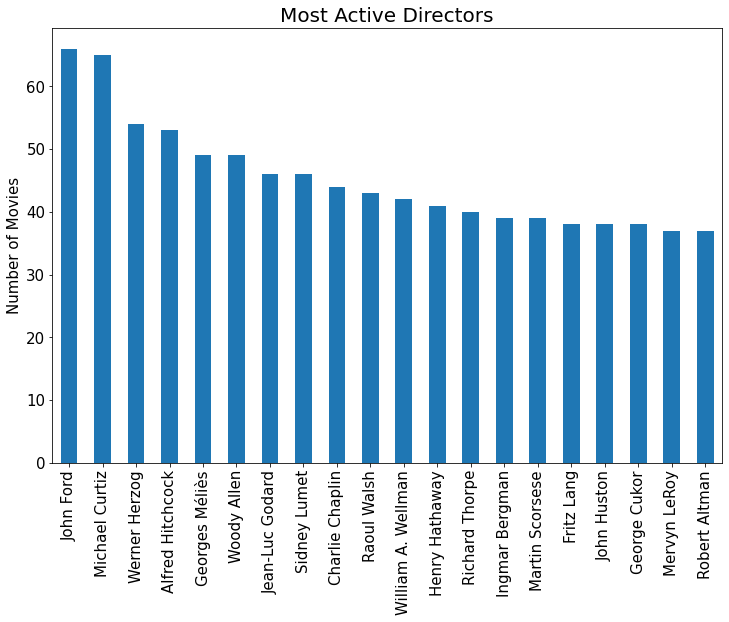

In [ ]:
plt.figure(figsize = (12, 8))
movie_df.director.value_counts().head(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Directors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [ ]:
director_df.nlargest(20, ("revenue_musd", "sum"))

title revenue_musd  ... vote_count             
                  count          sum  ...        sum         mean
director                              ...                        
Steven Spielberg     33  9256.621422  ...    62266.0  1886.848485
Peter Jackson        13  6528.244659  ...    47571.0  3659.307692
Michael Bay          13  6437.466781  ...    28767.0  2212.846154
James Cameron        11  5900.610310  ...    33736.0  3066.909091
David Yates           9  5334.563196  ...    31056.0  3450.666667
Christopher Nolan    11  4747.408665  ...    67344.0  6122.181818
Robert Zemeckis      19  4138.233542  ...    37666.0  1982.421053
Tim Burton           21  4032.916124  ...    36922.0  1758.190476
Ridley Scott         24  3917.529240  ...    43083.0  1795.125000
Chris Columbus       15  3866.836869  ...    26413.0  1760.866667
Roland Emmerich      16  3798.402596  ...    20085.0  1255.312500
Ron Howard           26  3714.152341  ...    21345.0   820.961538
J.J. Abrams           5  3579.215315  ...    21604.0  4320.800000
Gore Verbinski       10  3575.339236  ...    25354.0  2535.400000
George Lucas          7  3341.550893  ...    20190.0  2884.285714
Sam Raimi            15  3193.788606  ...    21956.0  1463.733333
Francis Lawrence      6  3183.341910  ...    24233.0  4038.833333
Clint Eastwood       35  3100.675162  ...    24001.0   685.742857
Bill Condon          10  3017.298095  ...    12416.0  1241.600000
Joss Whedon           5  2963.831071  ...    20548.0  4109.600000

[20 rows x 6 columns]

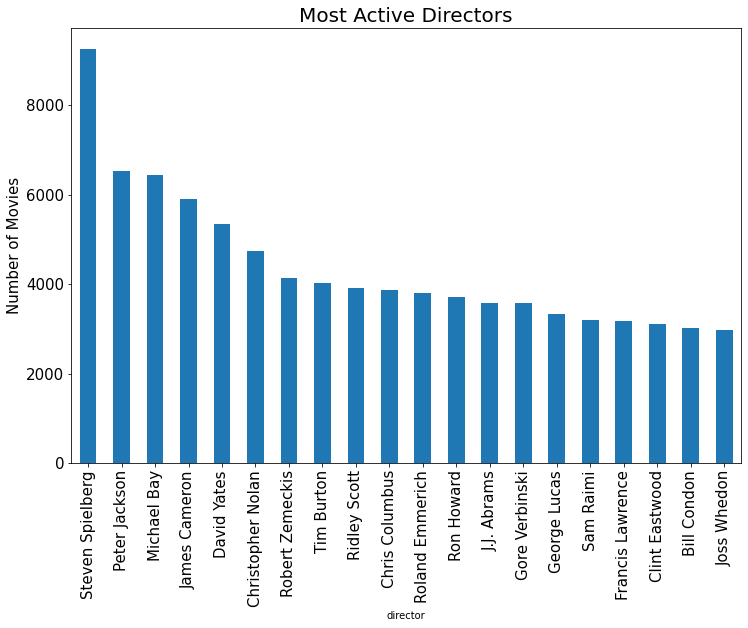

In [ ]:
plt.figure(figsize = (12, 8))
movie_df.groupby('director').revenue_musd.sum().nlargest(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Directors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [ ]:
director_df.nlargest(20, [("vote_count", "sum"), ("vote_average", "mean")])

title revenue_musd  ... vote_count             
                  count          sum  ...        sum         mean
director                              ...                        
Christopher Nolan    11  4747.408665  ...    67344.0  6122.181818
Steven Spielberg     33  9256.621422  ...    62266.0  1886.848485
Peter Jackson        13  6528.244659  ...    47571.0  3659.307692
Quentin Tarantino    10  1526.668694  ...    45910.0  4591.000000
Ridley Scott         24  3917.529240  ...    43083.0  1795.125000
Robert Zemeckis      19  4138.233542  ...    37666.0  1982.421053
David Fincher        10  2139.346325  ...    37588.0  3758.800000
Tim Burton           21  4032.916124  ...    36922.0  1758.190476
Martin Scorsese      39  1990.982842  ...    35541.0   911.307692
James Cameron        11  5900.610310  ...    33736.0  3066.909091
David Yates           9  5334.563196  ...    31056.0  3450.666667
Michael Bay          13  6437.466781  ...    28767.0  2212.846154
Bryan Singer         10  2808.235001  ...    27493.0  2749.300000
Chris Columbus       15  3866.836869  ...    26413.0  1760.866667
Gore Verbinski       10  3575.339236  ...    25354.0  2535.400000
Zack Snyder           8  2476.197387  ...    25069.0  3133.625000
Francis Lawrence      6  3183.341910  ...    24233.0  4038.833333
Jon Favreau           8  2639.644492  ...    24024.0  3003.000000
Clint Eastwood       35  3100.675162  ...    24001.0   685.742857
Sam Raimi            15  3193.788606  ...    21956.0  1463.733333

[20 rows x 6 columns]